# ASSIGNMENT #6 - MODEL DATA #
Due: 21 April 2024 @ 11:59p

Purpose:\
The purpose of this assignment is to examine the netCDF data format using model data and plotting the output.  

Overview:\
In this assignment you will read in ECMWF ERA-40 Reanalysis netCDF4 and plot the data on a map.


| | UPDATE TO YOUR INFORMATION | 
| :- | :- |
| Created By | Jared W. Marquis |
| Creation Date | 21 January 2024 |
| Course | ATSC 270 - Computer Concepts in Meteorology |

In [25]:
### UPDATE TO YOUR INFORMATION ###
#information allowing anyone with the code to print the author and contact information
__author__    = "Jared W. Marquis"
__contact__   = "jared.marquis@und.edu"

### IMPORT REQUIRED LIBRARIES ###

In [26]:
import numpy as np
from datetime import datetime, timedelta

from netCDF4 import Dataset

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

### OPEN NETCDF FILE ###

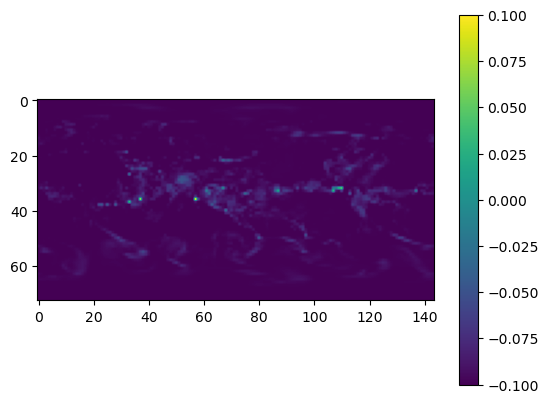

In [30]:
data = Dataset('ECMWF_ERA-40_subset.nc','r')
    
#analyze the variables and plot (on a map) SLP, 10-m winds, and total precipitation
lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]
time = data.variables['time'][:] #hours since 1900-01-01 00:00:0.

start_time = datetime(1900,1,1,0,0)
dts = np.empty(len(time),dtype=datetime)
for index, t in enumerate(time):
    dts[index] = start_time + timedelta(hours=int(t))

tp = data.variables['tp'][:]
p10u = data.variables['p10u'][:]
p10v = data.variables['p10v'][:]
msl = data.variables['msl'][:]*1000

plt.imshow(tp[1])
plt.imshow(msl[1])
plt.colorbar()


NameError: name 'vector_crs' is not defined

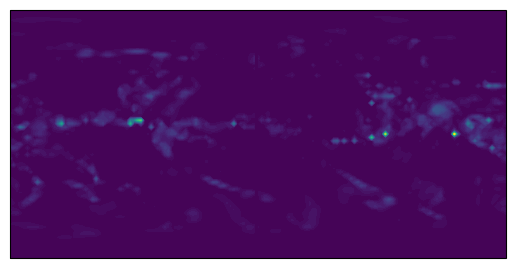

In [37]:
ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lon, lat, tp[1], 60,
             transform=ccrs.PlateCarree())
ax.quiver(lon, lat, tp[1], 60, transform=vector_crs)
ax.coastlines()

plt.show()